# **Dijkstra algorithm**



In [ ]:
#Author: Santiago Rios Guiral
#Email: santiagoguiralwe@gmail.com

import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
n_nodes = int(input("Number of nodes in the topology: "))
nodes = ['n{}'.format(i) for i in range(1, n_nodes+1)]
n_links = random.randint(n_nodes,(n_nodes*n_nodes-n_nodes)/2)

print(f'The number of links is: {n_links}')

Number of nodes in the topology: 6
The number of links is: 9


In [ ]:
#function that generates a random topoly
#arguments is the number of nodes and the number of links created
def generate_topo(n_links,n_nodes):
    n_connect = ['n{}'.format(i) for i in range(1, n_nodes+1)]
    connections={}
    topology={}
    #generates a dict (key node, value possible connections)
    for i in range(1,n_nodes+1):
        connections['n{}'.format(i)]=['n{}'.format(j) for j in range(1, n_nodes+1) if j!=i]
    iterator=n_links
    remain=n_links-n_nodes
    init_point=random.choice(n_connect)
    #generates a random link between nodes
    while iterator>0:
        #when the numbers of links are equal to the amount of nodes, guarantees at lest one link per node
        if iterator>remain:
            n_connect.remove(init_point)
            end_point = random.choice(connections.get(init_point))
            link = (init_point,end_point)
            connections[init_point].remove(end_point)
            connections[end_point].remove(init_point)
            if len(n_connect)>0:
                init_point = random.choice(n_connect)
        #add links to the topology randomly
        else:
            again = True
            while (again):
              k = list(connections.keys())
              init_point=random.choice(k)
              if (len(connections.get(init_point))>0):
                  again=False
                  end_point=random.choice(connections.get(init_point))
                  link = (init_point,end_point)
                  connections[init_point].remove(end_point)
                  connections[end_point].remove(init_point)
              else:
                  del connections[init_point]
        topology[link] = random.randrange(1,10)
        iterator-=1
    return topology

In [17]:
topo=generate_topo(n_links,n_nodes)
print(topo)

{('n6', 'n3'): 7, ('n2', 'n5'): 3, ('n5', 'n4'): 3, ('n3', 'n2'): 9, ('n4', 'n1'): 5, ('n1', 'n6'): 7, ('n3', 'n5'): 1, ('n4', 'n3'): 5, ('n5', 'n6'): 7}


# **Plot topology**

In [ ]:
#Plot the topology, argument is a dict with key as node link and value is the edge cost
def plot_topo (topo):
    plt.figure(1,figsize=(12,8))
    G=nx.Graph()
    for edge in topo:
        G.add_edge(edge[0], edge[1])
    graph_pos=nx.shell_layout(G)
    nx.draw_networkx_nodes(G,graph_pos,node_color='yellow',node_size=800)
    nx.draw_networkx_edges(G,graph_pos,edge_color='blue')
    nx.draw_networkx_labels(G, graph_pos)
    nx.draw_networkx_edge_labels(G, graph_pos, edge_labels = topo)
    plt.show()
    data = nx.info(G)


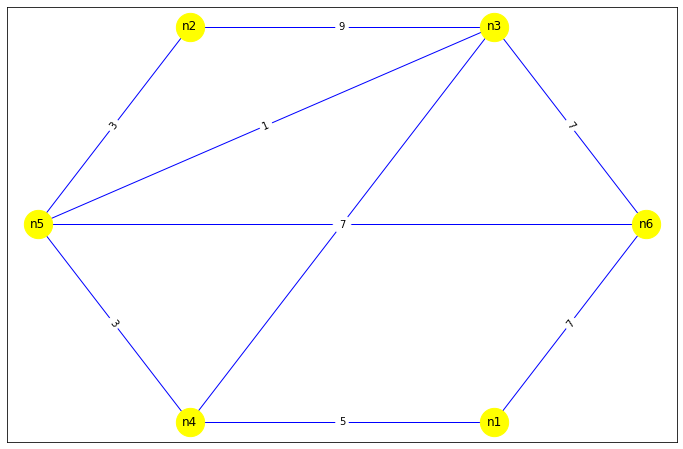

In [19]:
plot_topo(topo)

# **Link state algorithm**

In [ ]:
topo_routing={}
default=1e10
for n in nodes:
    #initialization of the routing table
    routing={}
    n_prime=[]
    neighbor_min=['n',0]
    for n_init in nodes:
        if (n_init!=n):
            if ((n_init,n) in topo):
                routing[n_init] = (topo.get((n_init,n)),n)
            elif ((n,n_init) in topo):
                routing[n_init] = (topo.get((n,n_init)),n)
            else:
                routing[n_init] = (default,n)
    n_prime.append(n)

    #Iterations on the algorithm    
    #get the node with the lest cost to n
    while len(n_prime)<len(nodes):
        current_cost = 1e10
        for key in routing:
            if (key not in n_prime):
                key_cost = routing.get(key)[0]
                if (key_cost<=current_cost):
                    current_cost=key_cost
                    neighbor_min[0]=key
                    neighbor_min[1]=current_cost
        node_cost = neighbor_min[1]
        n_prime.append(neighbor_min[0])

        #get the neighbors of the current node
        neighbors = {}
        for key in routing:
            if (key not in n_prime):
                if ((key,neighbor_min[0]) in topo):
                    neighbors[key]=topo.get((key,neighbor_min[0]))
                elif((neighbor_min[0],key) in topo):
                    neighbors[key]=topo.get((neighbor_min[0],key))

        #applying the algorithm
        for next_node in neighbors:
            if (next_node not in n_prime):
                cost_neighbors = routing.get(next_node)[0]
                if ((neighbors.get(next_node)+node_cost)<cost_neighbors):
                    new_cost=(neighbors.get(next_node)+node_cost)
                    routing[next_node] = (new_cost,neighbor_min[0])

    topo_routing[n]=routing

In [ ]:
def plot_state_link_result(topo_routing):
  for key in topo_routing:
    topo_node={}
    nodes_route = topo_routing.get(key)
    for new_key in nodes_route:
      if (nodes_route.get(new_key)!=key):
        if(((new_key,nodes_route.get(new_key)[1]) not in topo_node) and ((nodes_route.get(new_key)[1],new_key) not in topo_node)):
          topo_node[(new_key,nodes_route.get(new_key)[1])]= ''
        if (nodes_route.get(new_key)[1]!=key):
          if (((key,nodes_route.get(new_key)[1])not in topo_node) and ((nodes_route.get(new_key)[1],key) not in topo_node)):
            topo_node[(key,nodes_route.get(new_key)[1])]=''
      else:
        if (((nodes_route.get(new_key)[1],new_key) not in topo_node) and ((new_key,nodes_route.get(new_key)[1]) not in topo_node)):
          topo_node[(nodes_route.get(new_key)[1],new_key)]=''  
    print(f'Plot for node {key}')
    print (f'node: {key}\t {topo_routing.get(key)}')
    plot_topo(topo_node)


Plot for node n1
node: n1	 {'n2': (11, 'n5'), 'n3': (9, 'n5'), 'n4': (5, 'n1'), 'n5': (8, 'n4'), 'n6': (7, 'n1')}


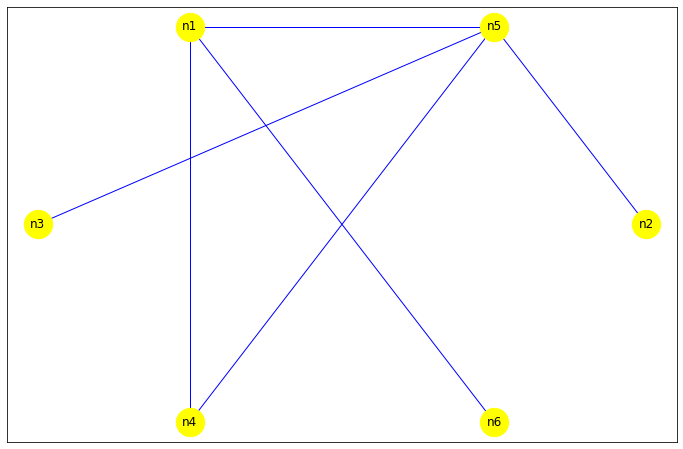

Plot for node n2
node: n2	 {'n1': (11, 'n4'), 'n3': (4, 'n5'), 'n4': (6, 'n5'), 'n5': (3, 'n2'), 'n6': (10, 'n5')}


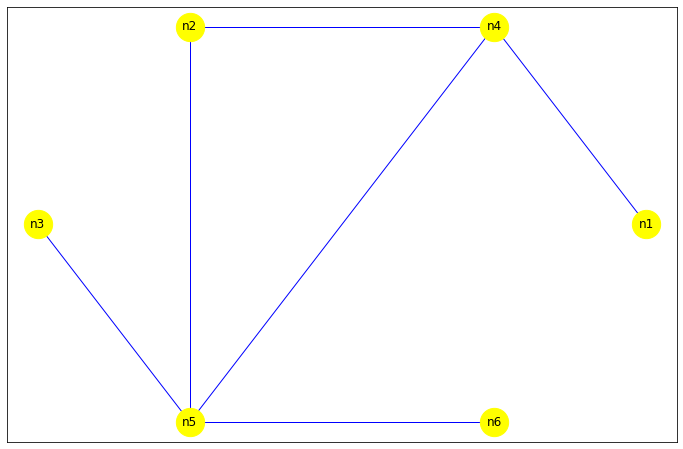

Plot for node n3
node: n3	 {'n1': (9, 'n4'), 'n2': (4, 'n5'), 'n4': (4, 'n5'), 'n5': (1, 'n3'), 'n6': (7, 'n3')}


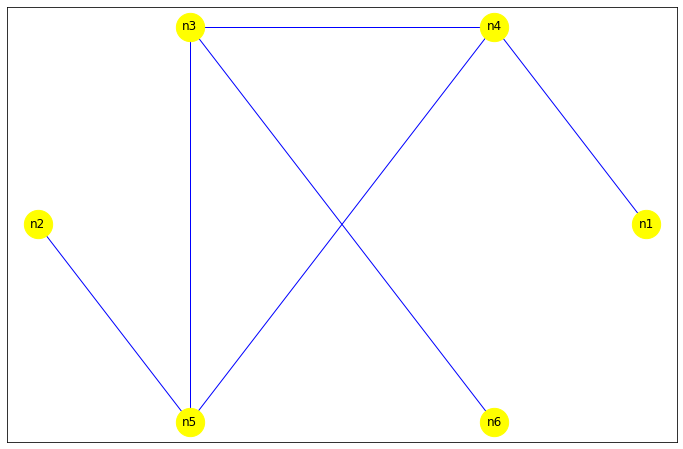

Plot for node n4
node: n4	 {'n1': (5, 'n4'), 'n2': (6, 'n5'), 'n3': (4, 'n5'), 'n5': (3, 'n4'), 'n6': (10, 'n5')}


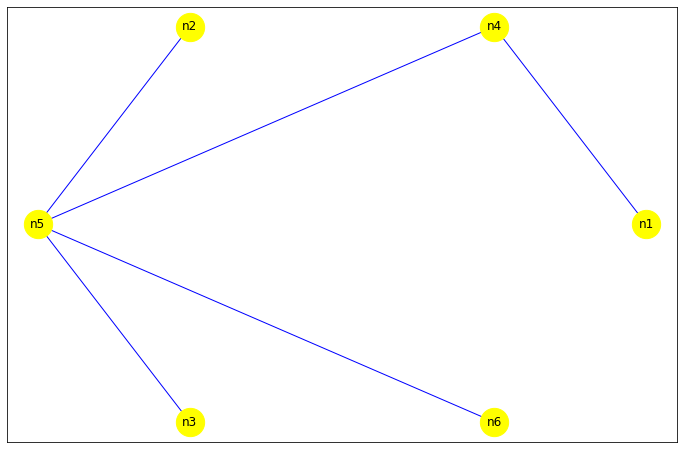

Plot for node n5
node: n5	 {'n1': (8, 'n4'), 'n2': (3, 'n5'), 'n3': (1, 'n5'), 'n4': (3, 'n5'), 'n6': (7, 'n5')}


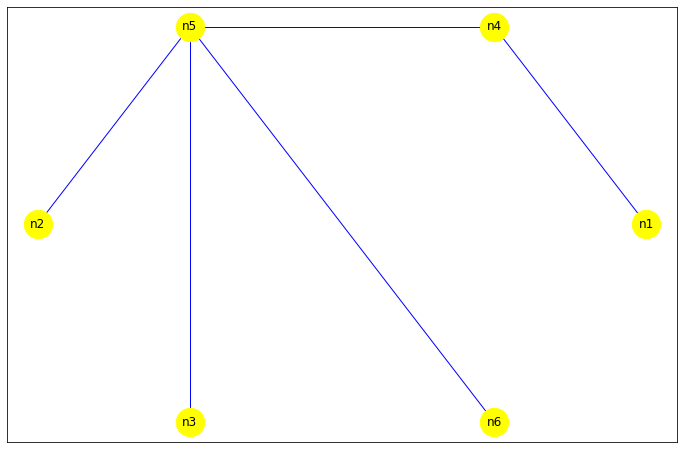

Plot for node n6
node: n6	 {'n1': (7, 'n6'), 'n2': (10, 'n5'), 'n3': (7, 'n6'), 'n4': (10, 'n5'), 'n5': (7, 'n6')}


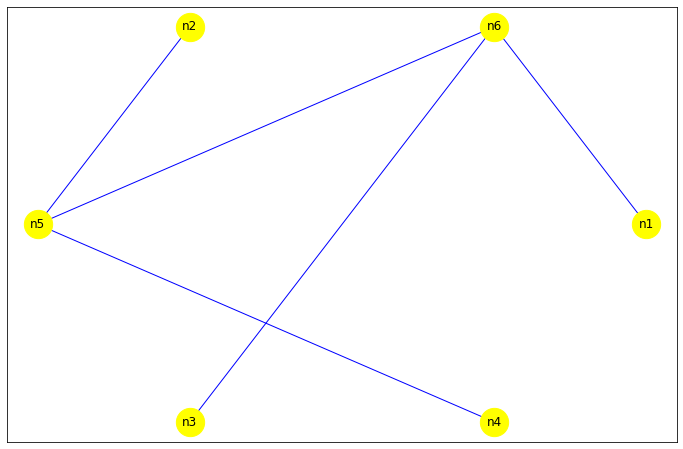

In [22]:
plot_state_link_result(topo_routing)

In [23]:
print('The routing table for the topology is: ','\n')

for key in topo_routing:
    print (f'node: {key}\t {topo_routing.get(key)}')

The routing table for the topology is:  

node: n1	 {'n2': (11, 'n5'), 'n3': (9, 'n5'), 'n4': (5, 'n1'), 'n5': (8, 'n4'), 'n6': (7, 'n1')}
node: n2	 {'n1': (11, 'n4'), 'n3': (4, 'n5'), 'n4': (6, 'n5'), 'n5': (3, 'n2'), 'n6': (10, 'n5')}
node: n3	 {'n1': (9, 'n4'), 'n2': (4, 'n5'), 'n4': (4, 'n5'), 'n5': (1, 'n3'), 'n6': (7, 'n3')}
node: n4	 {'n1': (5, 'n4'), 'n2': (6, 'n5'), 'n3': (4, 'n5'), 'n5': (3, 'n4'), 'n6': (10, 'n5')}
node: n5	 {'n1': (8, 'n4'), 'n2': (3, 'n5'), 'n3': (1, 'n5'), 'n4': (3, 'n5'), 'n6': (7, 'n5')}
node: n6	 {'n1': (7, 'n6'), 'n2': (10, 'n5'), 'n3': (7, 'n6'), 'n4': (10, 'n5'), 'n5': (7, 'n6')}


# Node Routes

In [ ]:
def routing_table(topo_routing):  
  topo_df={}
  nodes=list(topo_routing.keys())
  topo_df['Node']=nodes
  for i in range(len(nodes)):
    row=topo_routing.get(nodes[i])
    values=[]
    for node in row:
      values.append(row[node])
    index=int(nodes[i][1:])-1
    cost=values[:]
    cost[index:index] = [""]
    topo_df[nodes[i]]=cost
  df=pd.DataFrame(topo_df)
  return df

In [25]:
df=routing_table(topo_routing)
df

,Node,n1,n2,n3,n4,n5,n6
0,n1,,"(11, n4)","(9, n4)","(5, n4)","(8, n4)","(7, n6)"
1,n2,"(11, n5)",,"(4, n5)","(6, n5)","(3, n5)","(10, n5)"
2,n3,"(9, n5)","(4, n5)",,"(4, n5)","(1, n5)","(7, n6)"
3,n4,"(5, n1)","(6, n5)","(4, n5)",,"(3, n5)","(10, n5)"
4,n5,"(8, n4)","(3, n2)","(1, n3)","(3, n4)",,"(7, n6)"
5,n6,"(7, n1)","(10, n5)","(7, n3)","(10, n5)","(7, n5)",
